
This dataset is used to predict whether or not a patient has diabetes, based on given features/diagnostic measurements. 
Only female patients are considered with at least 21 years old of Pima Indian heritage.
Inputs:
- Pregnancies: Number of times pregnant
- GlucosePlasma: glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- Skin: ThicknessTriceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
Outputs:
- Diabetes or no diabetes (0 or 1) 

In [0]:
import pandas as pd
import io

Loading csv from personal github folder

In [0]:
#url = 'https://raw.githubusercontent.com/rannjit/ranjit/master/diabetes.csv?token=AIX6R8hgu6j5x5S42O3TjsO0tmXo154-ks5cbgX1wA%3D%3D'
#df = pd.read_csv(url)
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

In [0]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


               **      EDA**

In [0]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [0]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [0]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Visualizing the dataset**

---



In [0]:
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


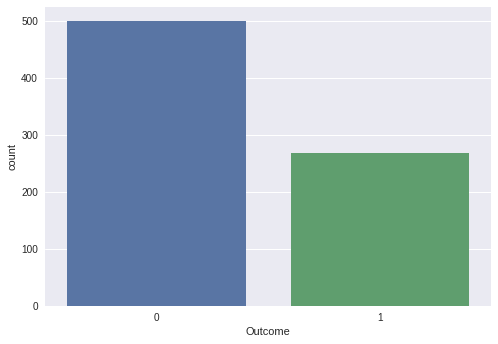

In [0]:
sns.countplot(x = 'Outcome', data = df)

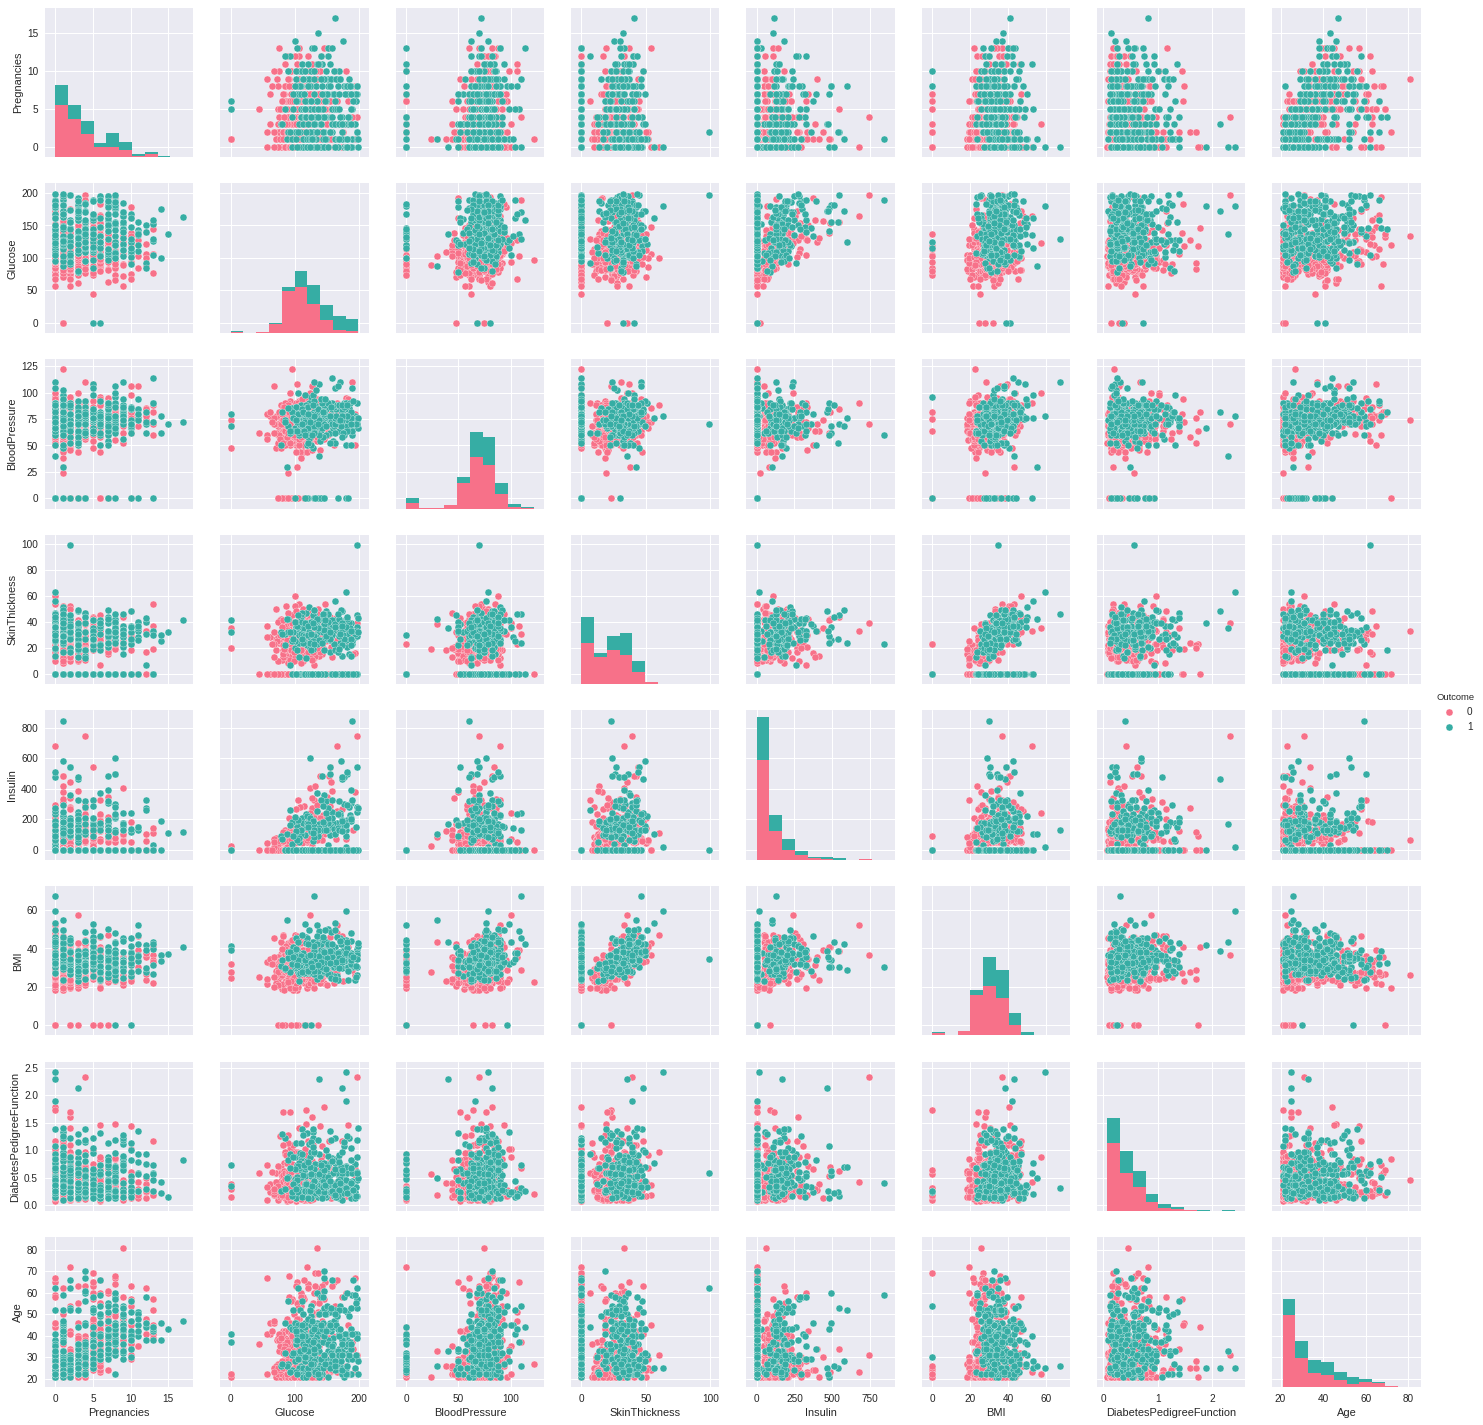

In [0]:
sns.pairplot(df, hue = 'Outcome', vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],palette="husl")

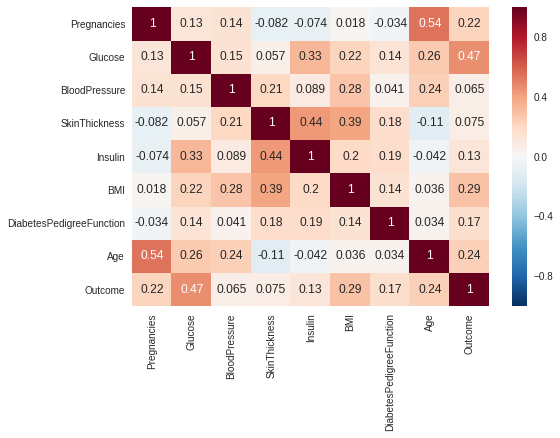

In [0]:
sns.heatmap(df.corr(), annot = True)


**Training and test data are made avaialable**

In [0]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
X=df.iloc[:,0:8].values

In [0]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [0]:
y=df.Outcome.values    # or y = df.iloc[:, 8].values

In [0]:
y# Feature Scaling is a must in ANN
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [0]:
# Feature Scaling is a must in ANN
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Training the model in ANN**

In [0]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
# Initialize the ANN
Classifier = Sequential()

# Adding input and first hidden layer
Classifier.add(Dense(activation="relu", input_dim=8, units=100, kernel_initializer="uniform"))

# Create the second hidden layer
Classifier.add(Dense(activation="relu", units=100, kernel_initializer="uniform"))

# DropOut layer
Classifier.add(Dropout(0.5))

# Create the second hidden layer
Classifier.add(Dense(activation="relu", units=100, kernel_initializer="uniform"))

# Create the output layer
Classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Compile the network 
Classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
Classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               900       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 21,201
Trainable params: 21,201
Non-trainable params: 0
_________________________________________________________________


In [0]:
Classifier.fit(X_train, y_train, batch_size = 20, nb_epoch = 500)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/500
614/614 [==============================] - 1s 2ms/step - loss: 0.6670 - acc: 0.6303
Epoch 2/500
614/614 [==============================] - 0s 296us/step - loss: 0.5443 - acc: 0.7101
Epoch 3/500
614/614 [==============================] - 0s 298us/step - loss: 0.4935 - acc: 0.7736
Epoch 4/500
614/614 [==============================] - 0s 301us/step - loss: 0.4757 - acc: 0.7736
Epoch 5/500
614/614 [==============================] - 0s 304us/step - loss: 0.4691 - acc: 0.7818
Epoch 6/500
614/614 [==============================] - 0s 294us/step - loss: 0.4692 - acc: 0.7850
Epoch 7/500
614/614 [==============================] - 0s 271us/step - loss: 0.4678 - acc: 0.7899
Epoch 8/500
614/614 [==============================] - 0s 292us/step - loss: 0.4551 - acc: 0.7850
Epoch 9/500
614/614 [==============================] - 0s 310us/step - loss: 0.4434 - acc: 0.7932
Epoch 10/500
614/614 [==============================] - 0s 270us/step - loss: 0.4418 - acc: 0.7915
Epoch 11/500
614/614 

In [0]:

# Predicting the Test set results
y_pred = Classifier.predict(X_test)
y_pred = (y_pred > 0.5)

**Evaluating**

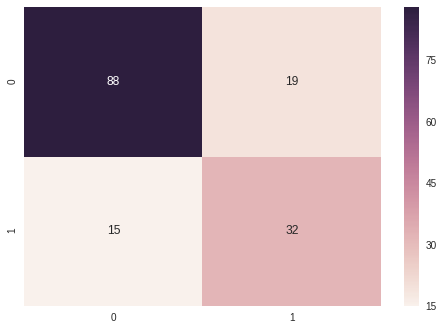

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       107
           1       0.63      0.68      0.65        47

   micro avg       0.78      0.78      0.78       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.79      0.78      0.78       154



Improving the model using cross validations

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense


In [0]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
    classifier.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier


In [0]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)



Epoch 1/100
552/552 [==============================] - 1s 1ms/step - loss: 0.6442 - acc: 0.6630
Epoch 2/100
552/552 [==============================] - 0s 502us/step - loss: 0.5124 - acc: 0.7663
Epoch 3/100
552/552 [==============================] - 0s 512us/step - loss: 0.4853 - acc: 0.7681
Epoch 4/100
552/552 [==============================] - 0s 507us/step - loss: 0.4731 - acc: 0.7609
Epoch 5/100
552/552 [==============================] - 0s 483us/step - loss: 0.4639 - acc: 0.7717
Epoch 6/100
552/552 [==============================] - 0s 513us/step - loss: 0.4610 - acc: 0.7754
Epoch 7/100
552/552 [==============================] - 0s 528us/step - loss: 0.4575 - acc: 0.7880
Epoch 8/100
552/552 [==============================] - 0s 546us/step - loss: 0.4523 - acc: 0.7844
Epoch 9/100
552/552 [==============================] - 0s 543us/step - loss: 0.4495 - acc: 0.7844
Epoch 10/100
552/552 [==============================] - 0s 538us/step - loss: 0.4463 - acc: 0.7862
Epoch 11/100
552/552 

In [0]:
mean = accuracies.mean()
variance = accuracies.std()
print(f"mean",mean)
print(f"StdDev",variance)

mean 0.7346906394727768
StdDev 0.042985217960870424


**GRID** ***SEARCH***

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

In [0]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
    classifier.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)

In [0]:
parameters = {'batch_size': [100, 200],
              'epochs': [10, 20],
              'optimizer': ['adam' 'rmsprop']}

In [0]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2)

In [0]:
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/10
552/552 [==============================] - 1s 3ms/step - loss: 0.5815 - acc: 0.6938
Epoch 2/10
552/552 [==============================] - 1s 996us/step - loss: 0.4979 - acc: 0.7554
Epoch 3/10
552/552 [==============================] - 1s 938us/step - loss: 0.4801 - acc: 0.7627
Epoch 4/10
552/552 [==============================] - 1s 1ms/step - loss: 0.4736 - acc: 0.7736
Epoch 5/10
552/552 [==============================] - 1s 931us/step - loss: 0.4685 - acc: 0.7844
Epoch 6/10
552/552 [==============================] - 1s 1ms/step - loss: 0.4648 - acc: 0.7808
Epoch 7/10
552/552 [==============================] - 1s 911us/step - loss: 0.4594 - acc: 0.7826
Epoch 8/10
552/552 [==============================] - 1s 919us/step - loss: 0.4631 - acc: 0.7899
Epoch 9/10
552/552 [==============================] - 0s 894us/step - loss: 0.4521 - acc: 0.7826
Epoch 10/10
552/552 [==============================] - 0s 904us/step - loss: 0.4480 - acc: 0.7826
Epoch 1/10
552/552 [===============

In [0]:
best_parameters = grid_search.best_params_
print(best_parameters)


{'batch_size': 10, 'epochs': 20, 'optimizer': 'rmsprop'}


In [0]:
best_accuracy = grid_search.best_score_

In [0]:
print(best_accuracy)

0.7768729641693811
